In [1]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout
from keras.layers import Layer
from skimage.transform import resize
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16 
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sys
from sklearn import preprocessing
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xg
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
tf.__version__

'2.10.1'

In [2]:
target = []
data = []
dir='D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset'
Categories = ['1','3','4']

size=124

In [3]:

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  path = os.path.join(dir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_resized =cv2.resize(img_array,(size,size))
    data.append(img_resized)
    target.append(target_class)

data = np.array(data)
target = np.array(target)

print('end')

Category is: 1 	Label encoded as: 0
Category is: 3 	Label encoded as: 1
Category is: 4 	Label encoded as: 2
end


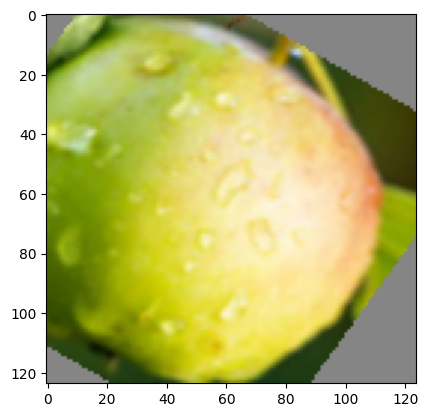

In [6]:
RGB_img=data[1520]
plt.imshow(RGB_img)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.01)

X_train.shape

(2375, 124, 124, 3)

In [23]:
y_train.shape

(2375,)

In [24]:
X_test.shape

(24, 124, 124, 3)

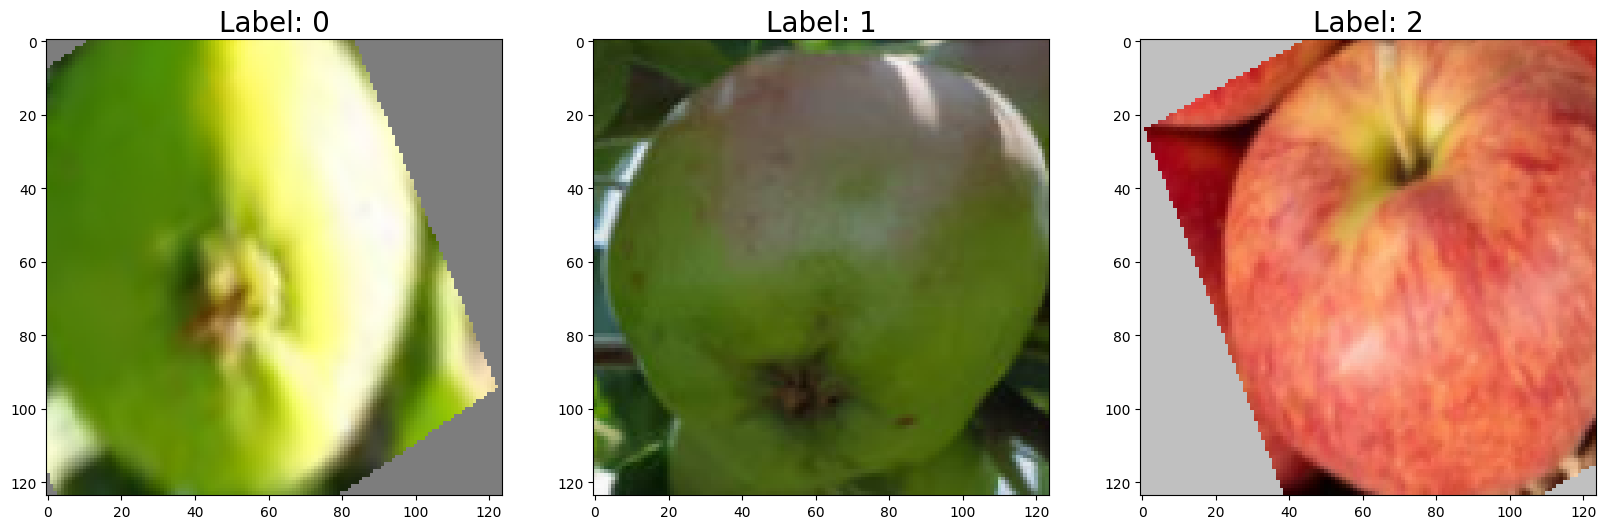

In [5]:
class_number = 3
f, ax = plt.subplots(1, class_number, figsize=(20,20))

for i in range(0, class_number):
    apple_sample = X_train[y_train == i][0]
    #apple_sample =cv2.cvtColor(apple_sample,cv2.COLOR_BGR2RGB)
    ax[i].imshow(apple_sample)
    ax[i].set_title("Label: {}".format(i), fontsize=20)

In [5]:
X_train = X_train / 255.0
X_test =  X_test / 255.0

In [6]:
VGG_Apple_Model = VGG16(weights='imagenet', include_top=False, input_shape=(size, size, 3))

for layer in VGG_Apple_Model.layers:
    layer.trainable = False
    


In [7]:
VGG_Apple_Model.summary()  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 124, 124, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 124, 124, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 62, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 62, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 62, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 31, 31, 128)       0     

In [8]:
VGG_Apple_Model1 = Model(inputs=VGG_Apple_Model.input, outputs=VGG_Apple_Model.get_layer('block5_conv1').output)

In [9]:
A_extractor_feature=VGG_Apple_Model1.predict(X_train)

75/75 [==============================] - 10s 57ms/step


In [20]:
VGG_Apple_Model1.save("VGG_Apple_Model1.h5")

In [21]:
A_extractor_feature.shape[0]

2375

In [11]:
features_A_t = A_extractor_feature.reshape(A_extractor_feature.shape[0], -1)

In [22]:
features_A_t.shape

(2375, 25088)

In [15]:
xgb1=XGBClassifier(n_estimators=1000,learning_rate=0.9,max_depth=7,booster='gbtree')
xgb1.fit(features_A_t, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [16]:
svc = SVC(kernel='rbf',degree=3,gamma='scale', C=10)
svc.fit(features_A_t, y_train)

SVC(C=10)

In [26]:
RandomForest1 = RandomForestClassifier(max_depth=7,n_estimators=1000,random_state=0)
RandomForest1.fit(features_A_t, y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=0)

In [14]:
FeatureX_test = VGG_Apple_Model1.predict(X_test)
FeatureX_test1 = FeatureX_test.reshape(FeatureX_test.shape[0], -1)

1/1 [==============================] - 2s 2s/step


In [ ]:
y_predict=xgb1.predict(FeatureX_test1)
print('end')

In [19]:
y_predict = svc.predict(FeatureX_test1)   #0.91
print('end')

end


In [27]:
y_predict=RandomForest1.predict(FeatureX_test1)
print('end')

end


In [20]:
ac=accuracy_score(y_test, y_predict)
print(ac.round(2))   

0.86


In [32]:
y_predict

array([0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2,
       1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0,
       1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2])

In [33]:
y_test

array([0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2,
       1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0,
       1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1,
       2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2])

In [31]:
dump(svc, 'Amin_transfer_svc.joblib')

['Amin_transfer_svc.joblib']

In [22]:
regressor = RandomForestRegressor(random_state = 0,max_depth=7,criterion='squared_error')
regressor.fit(features_A_t, y_train)
y_predict1 = regressor.predict(FeatureX_test1)
r2=r2_score(y_test,y_predict1).round(3)
print(r2)
MAE = mean_absolute_error(y_test, y_predict1)
print(MAE)
print('end')

0.46
0.5263945723438891
end


In [206]:
regressor = xg.XGBRegressor(objective ='reg:squarederror',learning_rate=0.9,n_estimators =1000,booster='gbtree')
regressor.fit(features_A_t, y_train)
print('end')

end


In [209]:
y_predict1 = regressor.predict(FeatureX_test1)
r2=r2_score(y_test,y_predict1).round(3)
print(r2)
MAE = mean_absolute_error(y_test, y_predict1)
print(MAE)

0.41
0.8376155126218995


In [15]:
#regressor =HuberRegressor(alpha=0.9,max_iter=6000)
regressor = TheilSenRegressor(random_state=0)# R2 0.832 MAE 0.28851575
#regressor=BayesianRidge()#R2 0.83

regressor.fit(features_A_t, y_train)
y_predict1 = regressor.predict(FeatureX_test1)
r2=r2_score(y_test,y_predict1).round(3)
print(r2)
MAE = mean_absolute_error(y_test, y_predict1)
print(MAE)

0.898
0.21413624254570493


In [16]:
y_predict1

array([ 0.64232553,  2.13672431,  2.11393998,  0.6597693 , -0.05876091,
        0.59038486,  0.26013864,  1.9215819 ,  2.11764405,  0.8590192 ,
        1.80425959,  1.87996929,  0.49115173,  0.95542439,  1.82424759,
       -0.00580441,  1.486245  ,  1.83366544,  1.7603522 ,  1.07263636,
        0.45517135,  2.08691993,  0.0887939 ,  0.81582252])

In [17]:
y_test

array([0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2,
       0, 1])

In [19]:
dump(regressor, 'Amin_transfer_TheilSenRegressor898.joblib')

['Amin_transfer_TheilSenRegressor898.joblib']

(124, 124, 3)

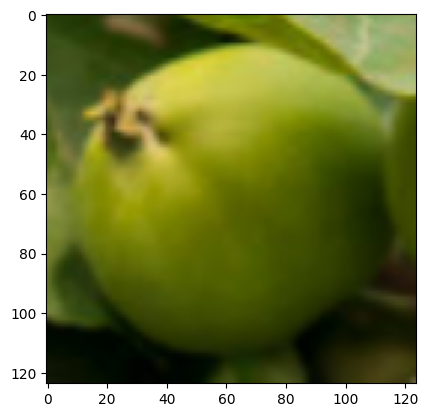

In [5]:
testDir='D:\\A.document\\A.opencv\\projects\\apple_garden\\others\\a1 (290).png'
#testDir='D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset\\3\\a1 (42).png'
#testDir='D:\\A.document\\A.opencv\\projects\\apple_garden\\counting\\test\\images\\testset1_355cluster_10.jpg'
img_test = cv2.imread(testDir) 
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
img_test = cv2.resize(img_test, (size, size))
img_test = img_test / 255.0
#img_test = cv2.resize(img_test,(size,size))
plt.imshow(img_test)
img_test.shape

In [6]:
MLmodel=load('Amin_transfer_svc.joblib')
MLmodel_R=load('Amin_transfer_TheilSenRegressor832.joblib')
DNNmodel1=keras.models.load_model("VGG_Apple_Model1.h5")

In [326]:
feature_testt.shape[0]

1

In [7]:
#img_test=img_test.reshape(1,size, size,3)
img_test = np.expand_dims(img_test, axis=0)
feature_testt = DNNmodel1.predict(img_test)
feature_testt = feature_testt.reshape(feature_testt.shape[0], -1)
print(feature_testt.shape)
#feature_testt = feature_testt.reshape(-1, 4608 )
y_predict_test = MLmodel.predict(feature_testt)
y_predict_test_R = MLmodel_R.predict(feature_testt)
print('end')

1/1 [==============================] - 4s 4s/step
(1, 25088)
end


In [77]:
img_test.shape

(1, 124, 124, 3)

In [8]:
feature_testt.shape

(1, 25088)

In [78]:
#y_test

In [9]:
y_predict_test  

array([0])

In [10]:
y_predict_test_R

array([0.01314492])